In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

./data\K11a1.gif
(1024, 1024)


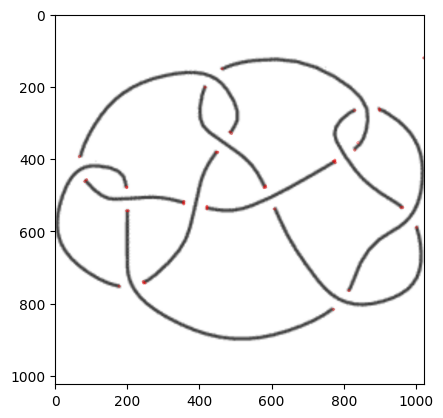

In [97]:
for f in os.scandir("./data"):
    print(f.path)
    img=np.array(Image.open(f.path),dtype=np.uint8)
    l=[]
    for w in range(img.shape[0]):
        for h in range(img.shape[1]):
            if not img[w][h] in l:
                l.append(img[w][h])
            img[w][h]=32*img[w][h]-1
            #if img[w][h]<8:
                #img[w][h]=0
            #else :
                #img[w][h]=255
    img=cv2.resize(img,(1024,1024))
    print(img.shape)
    fast=cv2.FastFeatureDetector_create(threshold=40)
    kp=fast.detect(img,None)
    img2=cv2.drawKeypoints(img,kp,None,color=(255,0,0))
    plt.imshow(img2,cmap='gray')
    break